# Data exploration
Here we take a look at the data to have an idea of its behaviour. No real analysis is done in this notebook.

In [91]:
# Import packages
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# set seaborn style and context for aesthetics
sns.set(context='notebook', style='ticks')

In [126]:
# define paths
data_path = "../../../Output/Measurements/"
output_path = "../../../Output/Figures/"

# read in data
df = (pd.read_csv(data_path + 'measurements_all.csv')
    #   .assign(date = lambda df_: pd.to_datetime(df_.date))
    # .assign(bio_replicate = lambda df_: df_.bio_replicate.astype('category'),)
    .loc[lambda df_: df_.ch3_target == 'PAX6'] # focus only on images that have PAX6 staining in channel 3 
)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60020 entries, 0 to 66359
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Image                   60020 non-null  object 
 1   Channel 2: Mean         60020 non-null  float64
 2   Channel 3: Mean         60020 non-null  float64
 3   Channel 2: Mean_bkg_C2  59697 non-null  float64
 4   Channel 3: Mean_bkg_C3  59697 non-null  float64
 5   ch2_bg_sub              59697 non-null  float64
 6   ch3_bg_sub              59697 non-null  float64
 7   date                    60020 non-null  object 
 8   project                 60020 non-null  object 
 9   plasmid_number          60020 non-null  int64  
 10  female_number           60020 non-null  object 
 11  embryo_number           60020 non-null  int64  
 12  slide_number            60020 non-null  object 
 13  ch1_target              60020 non-null  object 
 14  ch2_target              60020 non-null

In [274]:
# Look at value distributions
g = sns.FacetGrid(data=df, col='condition', col_wrap=4, sharey=False, aspect=2, xlim=(-300, 1500))
g.map_dataframe(sns.histplot, x='ch2_bg_sub', color='red', kde=True, label='Channel 2')
g.map_dataframe(sns.histplot, x='ch3_bg_sub', kde=True, label='Channel 3')
# g.set(yscale='log')
g.add_legend()
plt.show()

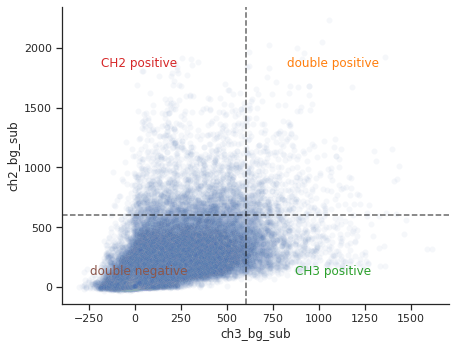

In [275]:
# Scatterplot of all points
g = sns.relplot(data=df, x='ch3_bg_sub', y='ch2_bg_sub', alpha=0.05, aspect=1.3)
ax = g.axes.ravel()[0]
# estimate possible line to separate categories
ax.axvline(600, ls='--', color='black', alpha=0.6)
ax.axhline(600, ls='--', color='black', alpha=0.6)
ax.text(0.2,0.1, 'double negative', transform=ax.transAxes, ha='center', color='tab:brown') 
ax.text(0.2,0.8, 'CH2 positive', transform=ax.transAxes, ha='center', color='tab:red')
ax.text(0.7,0.1, 'CH3 positive', transform=ax.transAxes, ha='center', color='tab:green')
ax.text(0.7,0.8, 'double positive', transform=ax.transAxes, ha='center', color='tab:orange')
plt.show()

In [95]:
# checkout replicate variable
sns.relplot(data=df, x='ch2_bg_sub', y='ch3_bg_sub',
           col='condition', col_wrap=4, hue='bio_replicate'
).set(ylabel='channel 3 mean', xlabel='channel 2 mean')

plt.show()

In [276]:
# select specific conditions to compare
conditions_to_keep = [1,3, 5, 7, 9]

df_comp = df[df.condition.isin(conditions_to_keep)].reset_index().drop(columns='index').copy()

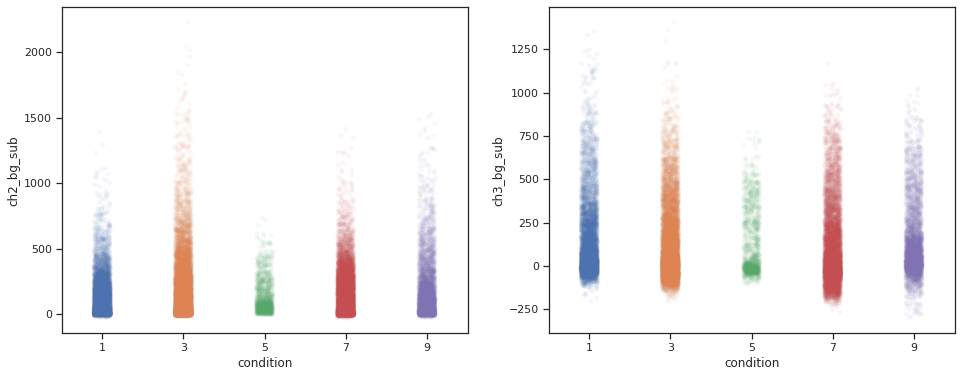

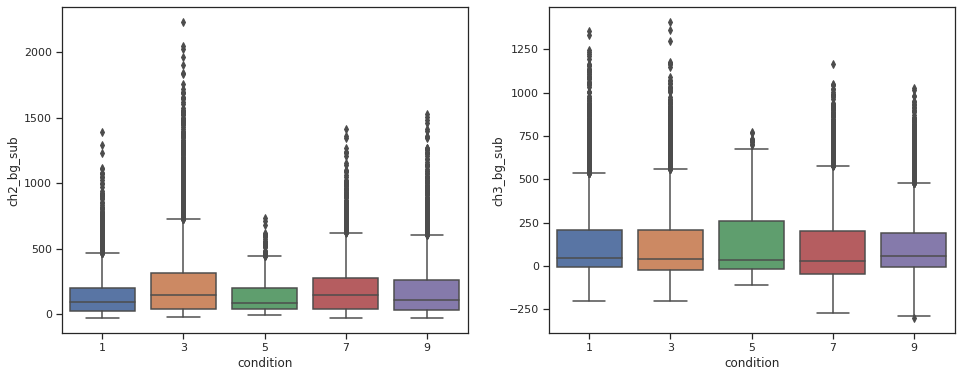

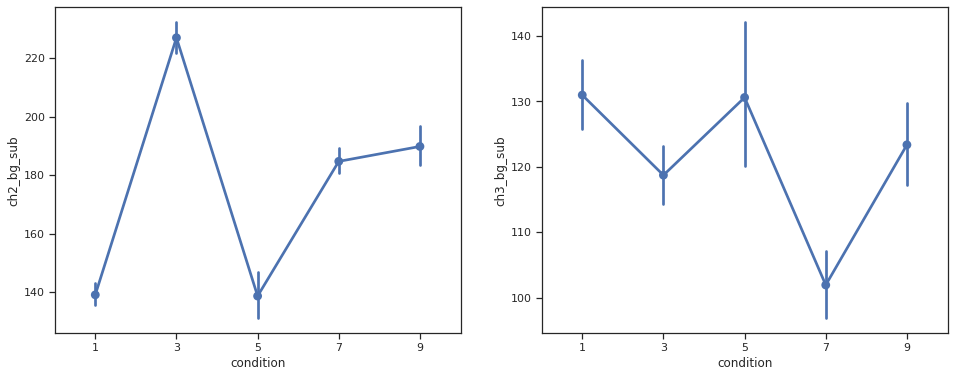

In [277]:
# Testing some visualizations for selected conditions
f, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
sns.stripplot(data=df_comp, x='condition', y='ch2_bg_sub', alpha=0.05, ax=ax1)
sns.stripplot(data=df_comp, x='condition', y='ch3_bg_sub', alpha=0.05, ax=ax2)

f, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
sns.boxplot(data=df_comp, x='condition', y='ch2_bg_sub', ax=ax1)
sns.boxplot(data=df_comp, x='condition', y='ch3_bg_sub', ax=ax2)

f, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
sns.pointplot(data=df_comp, x='condition', y='ch2_bg_sub', ax=ax1)
sns.pointplot(data=df_comp, x='condition', y='ch3_bg_sub', ax=ax2)

plt.show()